In [1]:
import sys
!{sys.executable} -m pip install scikit-surprise

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.0/772.0 kB 10.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp39-cp39-linux_x86_64.whl size=3195808 sha256=f7cb70e0c76333c1f9f0257e6c9589cf0457983a28e12d551fd4d8be132f73c5
  Stored in directory: /root/.cache/pip/wheels/c6/3a/46/9b17b3512bdf283c6cb84f59929cdd5199d4e754d596d22784
Successfully built scikit-surprise


In [2]:
import pandas as pd
import numpy as np
from surprise import SVD
import numpy as np
import surprise
from surprise import Reader, Dataset
from surprise.model_selection import cross_validate
from surprise import KNNBasic
from matplotlib import pyplot as plt

In [5]:
dataset = pd.read_csv('/content/ratings_small.csv')
dataset

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205
...,...,...,...,...
99999,671,6268,2.5,1065579370
100000,671,6269,4.0,1065149201
100001,671,6365,4.0,1070940363
100002,671,6385,2.5,1070979663


In [6]:
dataset.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [7]:
read = Reader(line_format='user item rating timestamp',sep=',',skip_lines=1, rating_scale=(1, 5))
ratingdata = Dataset.load_from_file("/content/ratings_small.csv",read)

In [8]:
svdalgorithm = SVD(biased = False)

In [9]:
PMF_result = cross_validate(svdalgorithm, ratingdata, measures=['RMSE', 'MAE'],cv=5,verbose = True)
print("PMF -",PMF_result)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.0121  1.0097  1.0101  1.0074  1.0151  1.0109  0.0026  
MAE (testset)     0.7800  0.7822  0.7805  0.7749  0.7865  0.7808  0.0037  
Fit time          1.48    1.37    1.32    1.31    1.33    1.36    0.06    
Test time         0.14    0.14    0.26    0.21    0.13    0.18    0.05    
PMF - {'test_rmse': array([1.01208952, 1.00967679, 1.01011267, 1.00735104, 1.01513669]), 'test_mae': array([0.78002247, 0.78222147, 0.78048418, 0.77491849, 0.78646563]), 'fit_time': (1.4834060668945312, 1.3694725036621094, 1.3214318752288818, 1.3099052906036377, 1.3323216438293457), 'test_time': (0.13804316520690918, 0.14399957656860352, 0.25840020179748535, 0.20837712287902832, 0.1276264190673828)}


In [10]:
PMFdf = pd.DataFrame.from_dict(PMF_result)
PMFdf

,test_rmse,test_mae,fit_time,test_time
0,1.012090,0.780022,1.483406,0.138043
1,1.009677,0.782221,1.369473,0.144000
2,1.010113,0.780484,1.321432,0.258400
3,1.007351,0.774918,1.309905,0.208377
4,1.015137,0.786466,1.332322,0.127626


In [11]:
print("Average PMF RMSE value", PMFdf['test_rmse'].mean())

Average PMF RMSE value 1.010873340917451


In [12]:
print("Average PMF MAE value", PMFdf['test_mae'].mean())

Average PMF MAE value 0.7808224495261561


In [13]:
sim_options = {'user_based': True }
user_based = KNNBasic(sim_options=sim_options)

In [14]:
user_based_results = cross_validate(user_based,ratingdata,measures=['rmse', 'mae'],cv=5,verbose=True)
print('user based results -', user_based_results)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9659  0.9750  0.9603  0.9608  0.9762  0.9676  0.0068  
MAE (testset)     0.7420  0.7499  0.7387  0.7418  0.7484  0.7442  0.0042  
Fit time          0.17    0.15    0.15    0.14    0.15    0.15    0.01    
Test time         1.65    1.49    1.64    1.64    1.85    1.66    0.11    
user based results - {'test_rmse': array([0.96589387, 0.97498786, 0.96026051, 0.96077698, 0.97615476]), 'test_mae': array([0.74203216, 0.74987695, 0.73874729, 0.74181374, 0.74837649]), 'fit_time': (0.1

In [15]:
userresultsdf = pd.DataFrame.from_dict(user_based_results)
userresultsdf

,test_rmse,test_mae,fit_time,test_time
0,0.965894,0.742032,0.173718,1.652482
1,0.974988,0.749877,0.154322,1.492965
2,0.960261,0.738747,0.148880,1.638139
3,0.960777,0.741814,0.143512,1.643000
4,0.976155,0.748376,0.149064,1.853027


In [16]:
print("Average User Based RMSE value", userresultsdf['test_rmse'].mean())

Average User Based RMSE value 0.9676147977968288


In [17]:
print("Average User Based MAE value", userresultsdf['test_mae'].mean())

Average User Based MAE value 0.7441693252389555


In [18]:
sim_options = {'user_based': False }
itembasedcf = KNNBasic(sim_options=sim_options)

In [19]:
item_based_results = cross_validate(itembasedcf,ratingdata,measures=['rmse', 'mae'],cv=5,verbose=True)
print('item based results -', item_based_results)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9282  0.9417  0.9378  0.9342  0.9281  0.9340  0.0053  
MAE (testset)     0.7159  0.7260  0.7233  0.7205  0.7158  0.7203  0.0040  
Fit time          3.90    6.74    4.40    4.21    3.94    4.64    1.07    
Test time         8.94    7.00    6.99    6.88    8.41    7.65    0.86    
item based results - {'test_rmse': array([0.92818708, 0.941693  , 0.93778046, 0.93420616, 0.92807577]), 'test_mae': array([0.7159193 , 0.72602965, 0.72329572, 0.72054154, 0.71584355]), 'fit_time': (3.8

In [20]:
itemresultsdf = pd.DataFrame.from_dict(item_based_results)
itemresultsdf

,test_rmse,test_mae,fit_time,test_time
0,0.928187,0.715919,3.896626,8.943716
1,0.941693,0.726030,6.737164,7.001765
2,0.937780,0.723296,4.396101,6.990630
3,0.934206,0.720542,4.213671,6.877426
4,0.928076,0.715844,3.941643,8.414818


In [21]:
print("Average User Based RMSE value", userresultsdf['test_rmse'].mean())

Average User Based RMSE value 0.9676147977968288


In [22]:
print("Average User Based MAE value", userresultsdf['test_mae'].mean())

Average User Based MAE value 0.7441693252389555


In [23]:
sim_options = {'user_based': False }
item_based = KNNBasic(sim_options=sim_options)

In [24]:
item_based_results = cross_validate(item_based,ratingdata,measures=['rmse', 'mae'],cv=5,verbose=True)
print('item based results -', item_based_results)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9352  0.9313  0.9315  0.9352  0.9421  0.9351  0.0039  
MAE (testset)     0.7204  0.7185  0.7191  0.7226  0.7248  0.7211  0.0023  
Fit time          4.04    4.19    5.57    4.01    3.93    4.35    0.62    
Test time         6.71    6.99    6.92    7.17    7.78    7.12    0.36    
item based results - {'test_rmse': array([0.9351867 , 0.93131195, 0.93149622, 0.93515989, 0.9421247 ]), 'test_mae': array([0.72043724, 0.7185333 , 0.71914253, 0.72261424, 0.72475118]), 'fit_time': (4.0

In [25]:
item_based_results_df = pd.DataFrame.from_dict(item_based_results)
item_based_results_df

,test_rmse,test_mae,fit_time,test_time
0,0.935187,0.720437,4.040105,6.713230
1,0.931312,0.718533,4.185877,6.994841
2,0.931496,0.719143,5.567933,6.923849
3,0.935160,0.722614,4.012349,7.166581
4,0.942125,0.724751,3.925689,7.783226


In [26]:
print("Average Item Based RMSE value", item_based_results_df['test_rmse'].mean())

Average Item Based RMSE value 0.9350558926002094


In [27]:
print("Average Item Based MAE value", item_based_results_df['test_mae'].mean())

Average Item Based MAE value 0.721095698444052


In [28]:
sim_options = {'name':'cosine','user_based': True }
cosineub = KNNBasic(sim_options=sim_options)

In [29]:
cosineubresults = cross_validate(cosineub,ratingdata,measures=['rmse', 'mae'],cv=5,verbose=True)
print('Impact of Cosine on User Based -', cosineubresults)

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9976  1.0049  0.9855  0.9891  0.9935  0.9941  0.0068  
MAE (testset)     0.7719  0.7751  0.7620  0.7654  0.7665  0.7682  0.0047  
Fit time          0.23    0.30    0.22    0.23    0.21    0.23    0.03    
Test time         1.85    2.20    1.50    1.51    1.56    1.72    0.27    
Impact of Cosine on User Based - {'test_rmse': array([0.99756291, 1.00492439, 0.98554026, 0.98906   , 0.99345666]), 'test_mae': array([0.77185043, 0.77514894, 0.7620083 , 0.76540405, 0.7

In [31]:
sim_options = {'name':'msd','user_based': True }
msdub = KNNBasic(sim_options=sim_options)

In [32]:
msdubresults = cross_validate(msdub,ratingdata,measures=['rmse', 'mae'],cv=5,verbose=True)
print('Impact of MSD on User Based -', msdubresults)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9679  0.9724  0.9636  0.9697  0.9636  0.9674  0.0034  
MAE (testset)     0.7452  0.7467  0.7411  0.7452  0.7415  0.7439  0.0022  
Fit time          0.17    0.15    0.19    0.24    0.17    0.18    0.03    
Test time         1.56    2.12    1.79    2.82    1.53    1.96    0.48    
Impact of MSD on User Based - {'test_rmse': array([0.96794298, 0.97237969, 0.96360392, 0.9696855 , 0.96361252]), 'test_mae': array([0.74520668, 0.74665374, 0.74110492, 0.74524279, 0.74148876]), 'fit_ti

In [34]:
sim_options = {'name':'pearson_baseline','user_based': True }
pbub = KNNBasic(sim_options=sim_options)

In [35]:
pbubresults = cross_validate(pbub,ratingdata,measures=['rmse', 'mae'],cv=5,verbose=True)
print('Impact of Pearson similarities on User Based -', pbubresults)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9877  1.0036  0.9899  1.0096  0.9919  0.9965  0.0085  
MAE (testset)     0.7632  0.7754  0.7664  0.7792  0.7654  0.7699  0.0062  
Fit time          0.73    0.57    0.80    0.60    0.58    0.65    0.09    
Test time         1.52    1.72    2.04    1.47    1.50  

In [36]:
sim_options = {'name':'cosine','user_based': False }
cosineib = KNNBasic(sim_options=sim_options)

In [37]:
cosineibresults = cross_validate(cosineib,ratingdata,measures=['rmse', 'mae'],cv=5,verbose=True)
print('Impact of Cosine on Item Based -', cosineibresults)

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9937  0.9895  0.9969  0.9969  0.9970  0.9948  0.0029  
MAE (testset)     0.7744  0.7691  0.7749  0.7746  0.7769  0.7740  0.0026  
Fit time          8.80    6.41    6.69    5.79    6.01    6.74    1.08    
Test time         6.54    7.18    7.40    7.90    8.13    7.43    0.56    
Impact of Cosine on Item Based - {'test_rmse': array([0.99374884, 0.98951133, 0.99692243, 0.99690591, 0.99701892]), 'test_mae': array([0.77436305, 0.76910494, 0.77487582, 0.77455502, 0.7

In [38]:
sim_options = {'name':'msd','user_based': False }
msdib = KNNBasic(sim_options=sim_options)

In [39]:
msdibresults = cross_validate(msdib,ratingdata,measures=['rmse', 'mae'],cv=5,verbose=True)
print('Impact of MSD on Item Based -', msdibresults)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9380  0.9402  0.9410  0.9368  0.9237  0.9359  0.0063  
MAE (testset)     0.7253  0.7238  0.7247  0.7206  0.7150  0.7219  0.0038  
Fit time          3.69    3.75    3.98    4.52    4.26    4.04    0.32    
Test time         7.35    6.98    6.95    7.10    7.04    7.08    0.14    
Impact of MSD on Item Based - {'test_rmse': array([0.93799691, 0.94015405, 0.94098152, 0.93684535, 0.92366167]), 'test_mae': array([0.72529269, 0.72382079, 0.72474619, 0.7205538 , 0.7149792 ]), 'fit_ti

In [40]:
sim_options = {'name':'pearson_baseline','user_based': False }
pbib = KNNBasic(sim_options=sim_options)

In [41]:
pbibresults = cross_validate(pbib,ratingdata,measures=['rmse', 'mae'],cv=5,verbose=True)
print('Impact of Pearson similarities on Item Based -', pbibresults)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9316  0.9426  0.9384  0.9489  0.9508  0.9425  0.0070  
MAE (testset)     0.7053  0.7140  0.7104  0.7179  0.7193  0.7134  0.0051  
Fit time          8.62    6.14    6.48    6.50    6.68    6.88    0.88    
Test time         7.94    7.91    7.92    6.86    6.63  

In [42]:
names = ['cosine', 'msd', 'pearson_baseline']
metrics = ['RMSE', 'MAE']
result_for_plot = {'user_based_cf': dict(),'item_based_cf': dict()}

for name in names:
    user_based = KNNBasic(sim_options={'name': name, 'user_based': True})
    item_based = KNNBasic(sim_options={'name': name, 'user_based': False})   
    user_based_combined = cross_validate(user_based, ratingdata, metrics, cv=5, verbose=True)
    item_based_combined = cross_validate(item_based, ratingdata, metrics, cv=5, verbose=True)
    result_for_plot['user_based_cf'][name] = user_based_combined
    result_for_plot['item_based_cf'][name] = item_based_combined

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9946  0.9966  0.9986  0.9954  0.9844  0.9939  0.0049  
MAE (testset)     0.7666  0.7699  0.7707  0.7722  0.7616  0.7682  0.0038  
Fit time          0.21    0.22    0.33    0.22    0.22    0.24    0.04    
Test time         1.83    2.34    1.82    1.56    1.56    1.82    0.29    
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity ma

In [43]:
graph = {'mae': {'cosine': [], 'msd': [],'pearson_baseline': []},'rmse': {'cosine': [],'msd': [],'pearson_baseline': []}}
for i, j in result_for_plot.items():
    for value, result in result_for_plot[i].items():
        graph['mae'][value].append(result['test_mae'].mean())
        graph['rmse'][value].append(result['test_rmse'].mean())

graph

{'mae': {'cosine': [0.7681911929342726, 0.7752816580084352],
  'msd': [0.7437020103289339, 0.7210025122766978],
  'pearson_baseline': [0.7695534529872109, 0.7131579721303146]},
 'rmse': {'cosine': [0.9939316223672892, 0.9951825200017369],
  'msd': [0.9678610027525073, 0.9346221530315699],
  'pearson_baseline': [0.9976489150131572, 0.941552147848211]}}

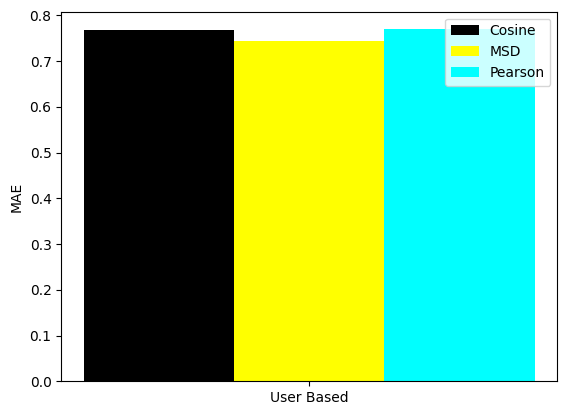

In [44]:
label = ['User Based']
value = np.arange(len(label))
width = 0.05

plt.bar(value-0.05, graph['mae']['cosine'][0], width,color ="black")
plt.bar(value, graph['mae']['msd'][0], width, color ="yellow")
plt.bar(value+0.05, graph['mae']['pearson_baseline'][0], width, color ="cyan")

plt.xticks(value, label)
plt.ylabel("MAE")
plt.yticks()
plt.legend(["Cosine", "MSD", "Pearson"])
plt.show()

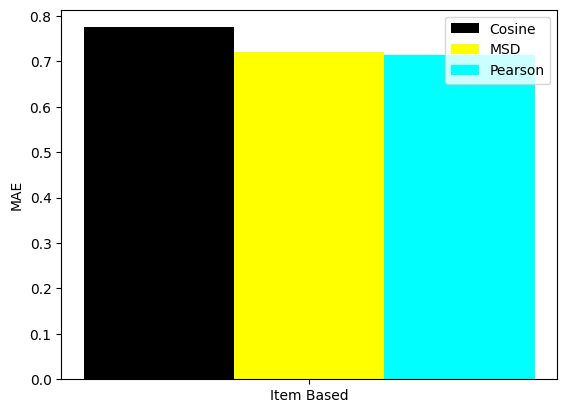

In [45]:
label = ['Item Based']
value = np.arange(len(label))
width = 0.1

plt.bar(value-0.1, graph['mae']['cosine'][1], width, color ="black")
plt.bar(value, graph['mae']['msd'][1], width, color ="yellow")
plt.bar(value+0.1, graph['mae']['pearson_baseline'][1], width, color ="cyan")

plt.xticks(value, label)
plt.ylabel("MAE")
plt.yticks()
plt.legend(["Cosine", "MSD", "Pearson"])
plt.show()

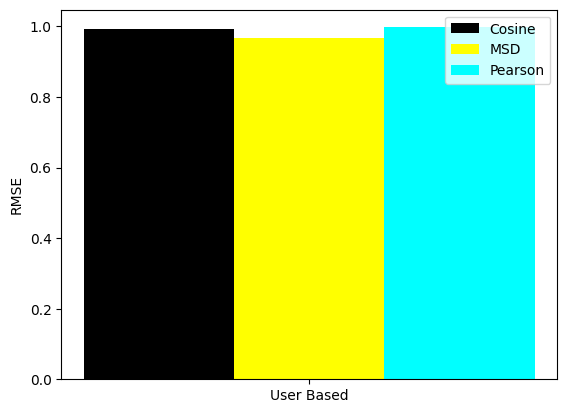

In [46]:
label = ['User Based']
value = np.arange(len(label))
width = 0.1

plt.bar(value-0.1, graph['rmse']['cosine'][0], width, color ="black")
plt.bar(value, graph['rmse']['msd'][0], width, color ="yellow")
plt.bar(value+0.1, graph['rmse']['pearson_baseline'][0], width, color ="cyan")

plt.xticks(value, label)
plt.ylabel("RMSE")
plt.yticks()
plt.legend(["Cosine", "MSD", "Pearson"])
plt.show()

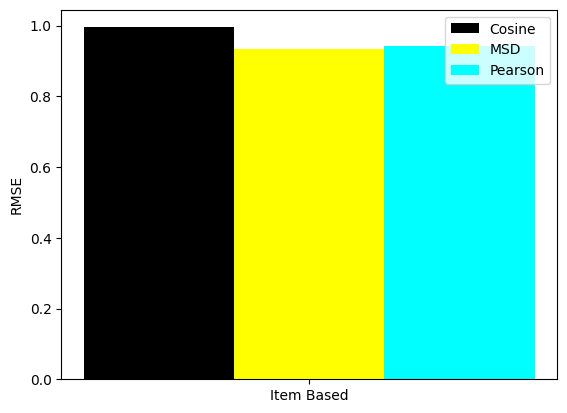

In [47]:
label = ['Item Based']
value = np.arange(len(label))
width = 0.1

plt.bar(value-0.1, graph['rmse']['cosine'][1], width,color="black")
plt.bar(value, graph['rmse']['msd'][1], width, color ="yellow")
plt.bar(value+0.1, graph['rmse']['pearson_baseline'][1], width, color= "cyan")

plt.xticks(value, label)
plt.ylabel("RMSE")
plt.yticks()
plt.legend(["Cosine", "MSD", "Pearson"])
plt.show()

In [50]:
k_start = 1
mean = 2000
user_based_results = []
measures = ['RMSE', 'MAE']

for i in range(1,100):
    knnub = KNNBasic(sim_options={'user_based': True}, k=i)
    cvub = cross_validate(knnub, ratingdata, measures, verbose=True, cv=5)

    start_mean = cvub['test_rmse'].mean()
    if start_mean < mean:
        mean = start_mean
        k_start = i
    user_based_results.append(start_mean)
    print(i)

print(k_start, mean)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.2054  1.2123  1.2111  1.2132  1.2084  1.2101  0.0028  
MAE (testset)     0.8995  0.9054  0.9019  0.9076  0.9001  0.9029  0.0031  
Fit time          0.21    0.17    0.16    0.16    0.21    0.18    0.02    
Test time         1.03    0.91    1.21    1.27    1.65    1.21    0.25    
1
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing

In [51]:
k_start = 1
mean = 200000
item_based_results = []
measures = ['RMSE', 'MAE']

for i in range(1,100):
    knnib = KNNBasic(sim_options={'user_based': False}, k=i)
    cvib = cross_validate(knnib, ratingdata, measures, verbose=True, cv=5)

    start_mean = cvib['test_rmse'].mean()
    if start_mean < mean:
        mean = start_mean
        k_start = i
    item_based_results.append(start_mean)
    print(i)
print(k_start, mean)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.3310  1.3126  1.3018  1.3050  1.3017  1.3104  0.0110  
MAE (testset)     0.9885  0.9706  0.9646  0.9637  0.9586  0.9692  0.0104  
Fit time          6.53    5.13    4.05    3.96    4.66    4.87    0.94    
Test time         5.36    5.13    6.21    6.25    6.51    5.89    0.54    
1
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing

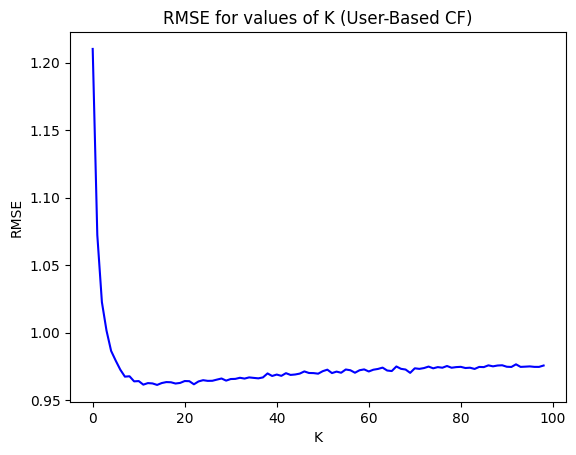

In [52]:
plt.plot(user_based_results, color = 'blue')
plt.xlabel("K")
plt.ylabel("RMSE")
plt.title("RMSE for values of K (User-Based CF)")
plt.show()

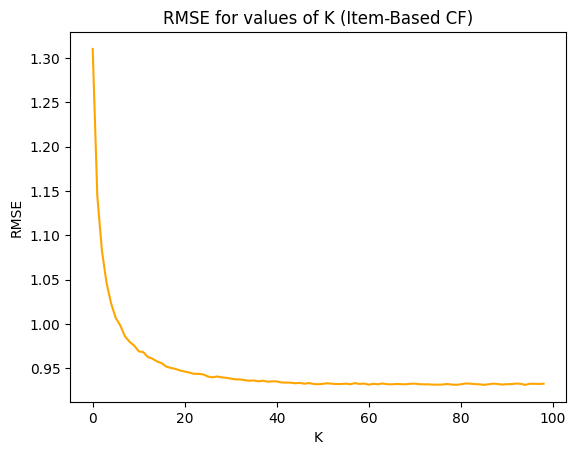

In [53]:
plt.plot(item_based_results, color = 'orange')
plt.xlabel("K")
plt.ylabel("RMSE")
plt.title("RMSE for values of K (Item-Based CF)")
plt.show()

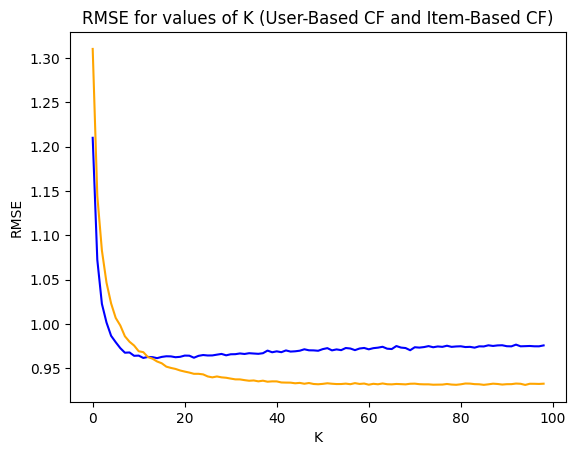

In [54]:
plt.plot(user_based_results, color = 'blue')
plt.plot(item_based_results, color='orange')
plt.xlabel("K")
plt.ylabel("RMSE")
plt.title("RMSE for values of K (User-Based CF and Item-Based CF)")
plt.show()

In [55]:
min_k_ub = min(user_based_results)
index_min_ub = user_based_results.index(min_k_ub)
print('K with min RMSE for User-Based: ',index_min_ub)

K with min RMSE for User-Based:  14


In [56]:
min_k_ib = min(item_based_results)
index_min_ib = item_based_results.index(min_k_ib)
print('K with min RMSE for Item-Based: ',index_min_ib)

K with min RMSE for Item-Based:  94
